In [24]:
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt


def load_and_center_dataset(filename):
    x = np.load(filename)
    centered_x = x - np.mean(x, axis=0)
    return centered_x


def get_covariance(dataset):
    S = (1/(len(dataset) - 1)) * np.dot(np.transpose(dataset),dataset)
    return S


def get_eig(S, m):
    vals, vecs = eigh(S, eigvals=[len(S)-m, len(S) - 1])
    eigvals = np.zeros((m, m))
    np.fill_diagonal(eigvals, vals)
    eigvals = np.fliplr(eigvals)
    U = np.fliplr(vecs)
    Lambda = np.flipud(eigvals)
    return Lambda, U


def get_eig_prop(S, prop):
    vals, vecs = eigh(S)
    eigSum = 0
    counter = 0
    for num in vals:
        eigSum += num

    for num in vals:
        if (num/eigSum) >= prop:
            break
        else:
            counter += 1

    eigvals, eigvecs = get_eig(S, len(S) - counter)
    Lambda, U = eigvals, eigvecs
    return Lambda, U



def project_image(image, U):
    project = np.zeros([len(U), 1])
    a = np.dot(np.transpose(U), image)
    i = 0
    for val in U:
        project[i] = np.dot(a, val)
        i += 1
    return project


def display_image(orig, proj):
    original = np.reshape(orig, [32, 32])
    original = np.transpose(original)
    projection = np.reshape(proj, [32, 32])
    projection = np.transpose(projection)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    ax1.set_title("Original")
    ax2.set_title("Projection")

    orig_img = ax1.imshow(original, aspect='equal')
    proj_img = ax2.imshow(projection, aspect='equal')

    fig.colorbar(orig_img, ax=ax1)
    fig.colorbar(proj_img, ax=ax1)

    return fig, ax1, ax2
    plt.show()

ValueError: too many values to unpack (expected 2)

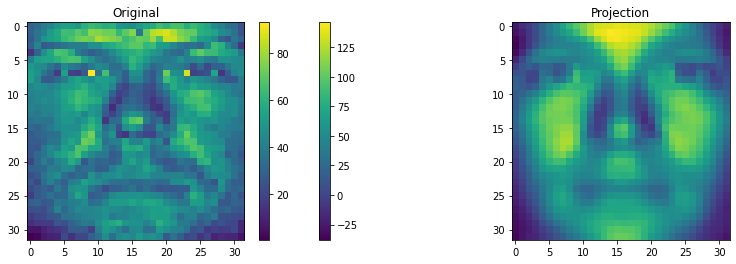

In [25]:
x = load_and_center_dataset('YaleB_32x32.npy')
S = get_covariance(x)
Lambda, U = get_eig(S, 2)
projection = project_image(x[0], U)
fig, (ax1, ax2) = display_image(x[0], projection)